In [2]:
#시각화 lib import
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic') # Mac 한글사용

In [3]:
import pandas as pd

# 사용 할 데이터 read

In [39]:
cj_df = pd.read_csv('프로젝트A/청주_날씨_인구_산업_co', index_col=0)
wj_df = pd.read_csv('프로젝트A/원주_날씨_인구_산업_co', index_col=0)
jj_df = pd.read_csv('프로젝트A/제주_날씨_인구_산업_co', index_col=0)
gm_df = pd.read_csv('프로젝트A/구미_날씨_인구_산업_co', index_col=0)
kwdf = pd.read_csv('프로젝트A/전국기온평균', index_col=0)

# 전체 기온데이터

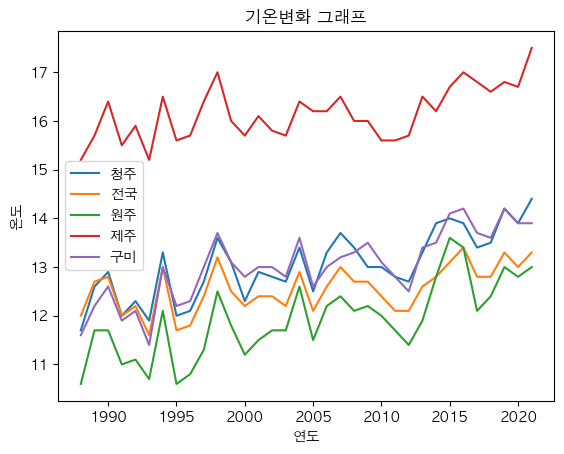

In [120]:
fig, ax = plt.subplots()  # Create a figure and an axes with pyplot.subplots()
ax.plot(cj_df.index, cj_df['청주연평균기온(℃)'],label='청주')  
ax.plot(cj_df.index, kwdf['전국평균기온(℃)'],label='전국')  
ax.plot(wj_df.index, wj_df['원주연평균기온(℃)'],label='원주') 
ax.plot(jj_df.index, jj_df['제주연평균기온(℃)'],label='제주')
ax.plot(gm_df.index, gm_df['구미연평균기온(℃)'],label='구미')

ax.set_xlabel('연도')  
ax.set_ylabel('온도') 
ax.set_title("기온변화 그래프")  # Add a title to the axes.
ax.legend();  # Add a legend.

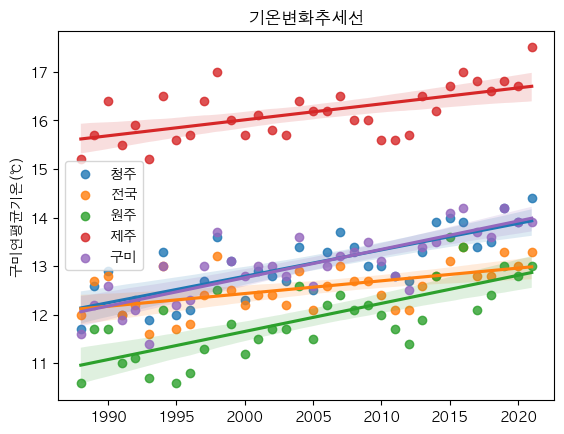

In [121]:
sns.regplot(x=cj_df.index, y=cj_df['청주연평균기온(℃)'],label='청주')
sns.regplot(x=cj_df.index, y=kwdf['전국평균기온(℃)'],label='전국')
sns.regplot(x=wj_df.index, y=wj_df['원주연평균기온(℃)'],label='원주')
sns.regplot(x=jj_df.index, y=jj_df['제주연평균기온(℃)'],label='제주')
sns.regplot(x=gm_df.index, y=gm_df['구미연평균기온(℃)'],label='구미')
plt.legend()
plt.title("기온변화추세선")

plt.show()

In [136]:
# 정규화
w_df = pd.concat([kwdf['전국평균기온(℃)'],
                  cj_df['청주연평균기온(℃)'],
                  wj_df['원주연평균기온(℃)'],
                  jj_df['제주연평균기온(℃)'],
                  gm_df['구미연평균기온(℃)']], axis=1)
w_df

,전국평균기온(℃),청주연평균기온(℃),원주연평균기온(℃),제주연평균기온(℃),구미연평균기온(℃)
1988,12.0,11.7,10.6,15.2,11.6
1989,12.7,12.6,11.7,15.7,12.2
1990,12.8,12.9,11.7,16.4,12.6
1991,12.0,12.0,11.0,15.5,11.9
1992,12.2,12.3,11.1,15.9,12.1
1993,11.6,11.9,10.7,15.2,11.4
1994,13.0,13.3,12.1,16.5,13.0
1995,11.7,12.0,10.6,15.6,12.2
1996,11.8,12.1,10.8,15.7,12.3
1997,12.4,12.7,11.3,16.4,13.0


In [126]:
# 정규화
from sklearn import preprocessing
x = w_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
w_df_scaled = pd.DataFrame(x_scaled, index=w_df.index, columns=w_df.columns)

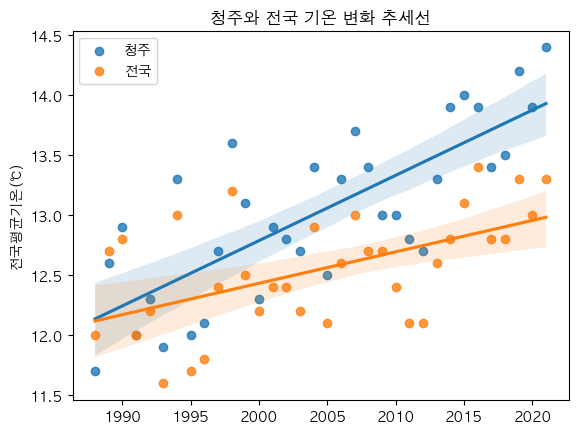

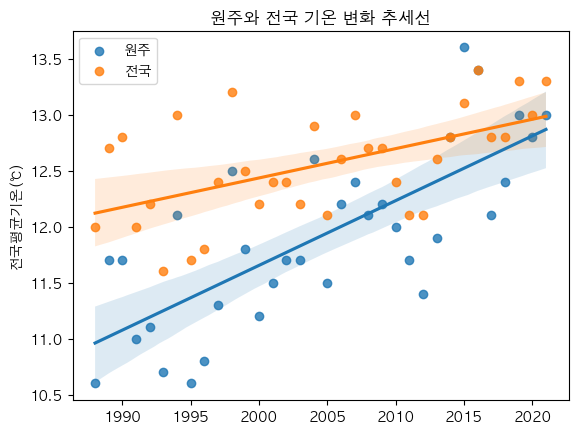

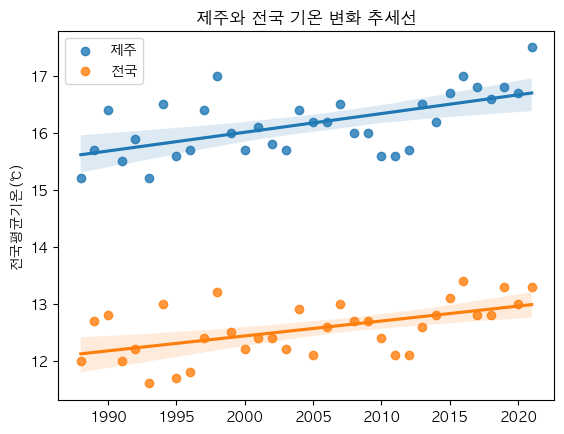

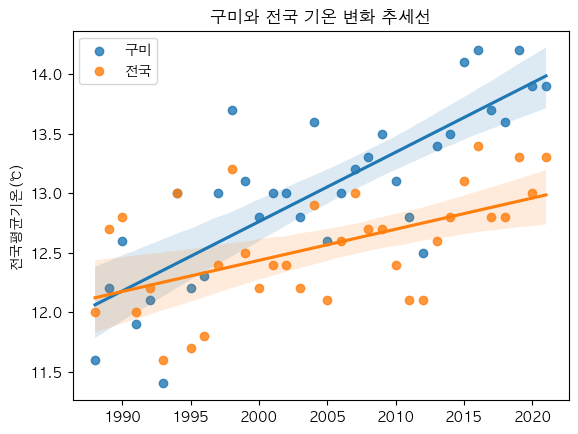

<Figure size 640x480 with 0 Axes>

In [141]:
x=w_df.index
y=w_df
sns.regplot(x=x, y=y.iloc[:,1],label='청주')
sns.regplot(x=x, y=y.iloc[:,0],label='전국')
plt.legend()
plt.title("청주와 전국 기온 변화 추세선")
plt.show()
plt.savefig('청주와_전국') 
sns.regplot(x=x, y=y.iloc[:,2],label='원주')
sns.regplot(x=x, y=y.iloc[:,0],label='전국')
plt.legend()
plt.title("원주와 전국 기온 변화 추세선")
plt.show()
plt.savefig('원주와_전국') 
sns.regplot(x=x, y=y.iloc[:,3],label='제주')
sns.regplot(x=x, y=y.iloc[:,0],label='전국')
plt.legend()
plt.title("제주와 전국 기온 변화 추세선")
plt.show()
plt.savefig('제주와_전국') 
sns.regplot(x=x, y=y.iloc[:,4],label='구미')
sns.regplot(x=x, y=y.iloc[:,0],label='전국')

plt.legend()
plt.title("구미와 전국 기온 변화 추세선")

plt.show()
plt.savefig('구미와_전국') 

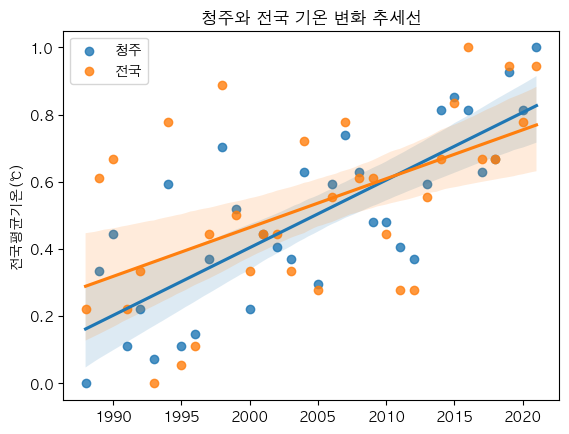

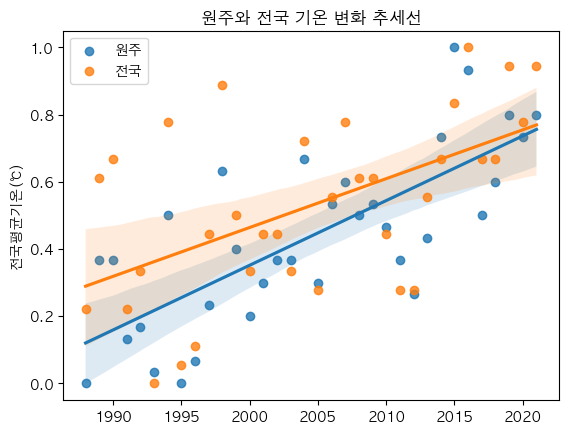

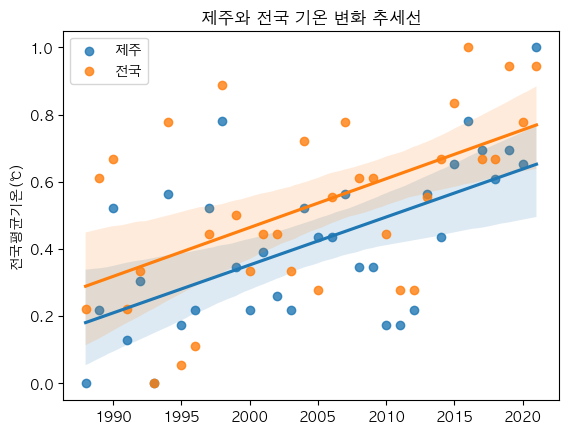

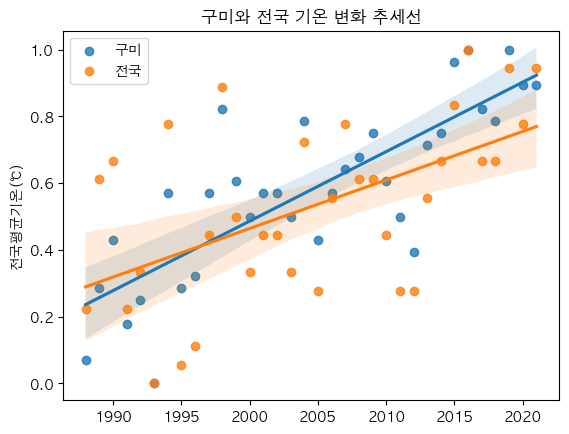

<Figure size 640x480 with 0 Axes>

In [140]:
x=w_df_scaled.index
y=w_df_scaled
sns.regplot(x=x, y=y.iloc[:,1],label='청주')
sns.regplot(x=x, y=y.iloc[:,0],label='전국')
plt.legend()
plt.title("청주와 전국 기온 변화 추세선")
plt.show()
plt.savefig('청주와_전국_정규화') 
sns.regplot(x=x, y=y.iloc[:,2],label='원주')
sns.regplot(x=x, y=y.iloc[:,0],label='전국')
plt.legend()
plt.title("원주와 전국 기온 변화 추세선")
plt.show()
plt.savefig('원주와_전국_정규화') 
sns.regplot(x=x, y=y.iloc[:,3],label='제주')
sns.regplot(x=x, y=y.iloc[:,0],label='전국')
plt.legend()
plt.title("제주와 전국 기온 변화 추세선")
plt.show()
plt.savefig('제주와_전국_정규화') 
sns.regplot(x=x, y=y.iloc[:,4],label='구미')
sns.regplot(x=x, y=y.iloc[:,0],label='전국')

plt.legend()
plt.title("구미와 전국 기온 변화 추세선")

plt.show()
plt.savefig('구미와_전국_정규화') 

# 청주

In [192]:
from sklearn import preprocessing
x = cj_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cj_df_scaled = pd.DataFrame(x_scaled, index=cj_df.index, columns=cj_df.columns)

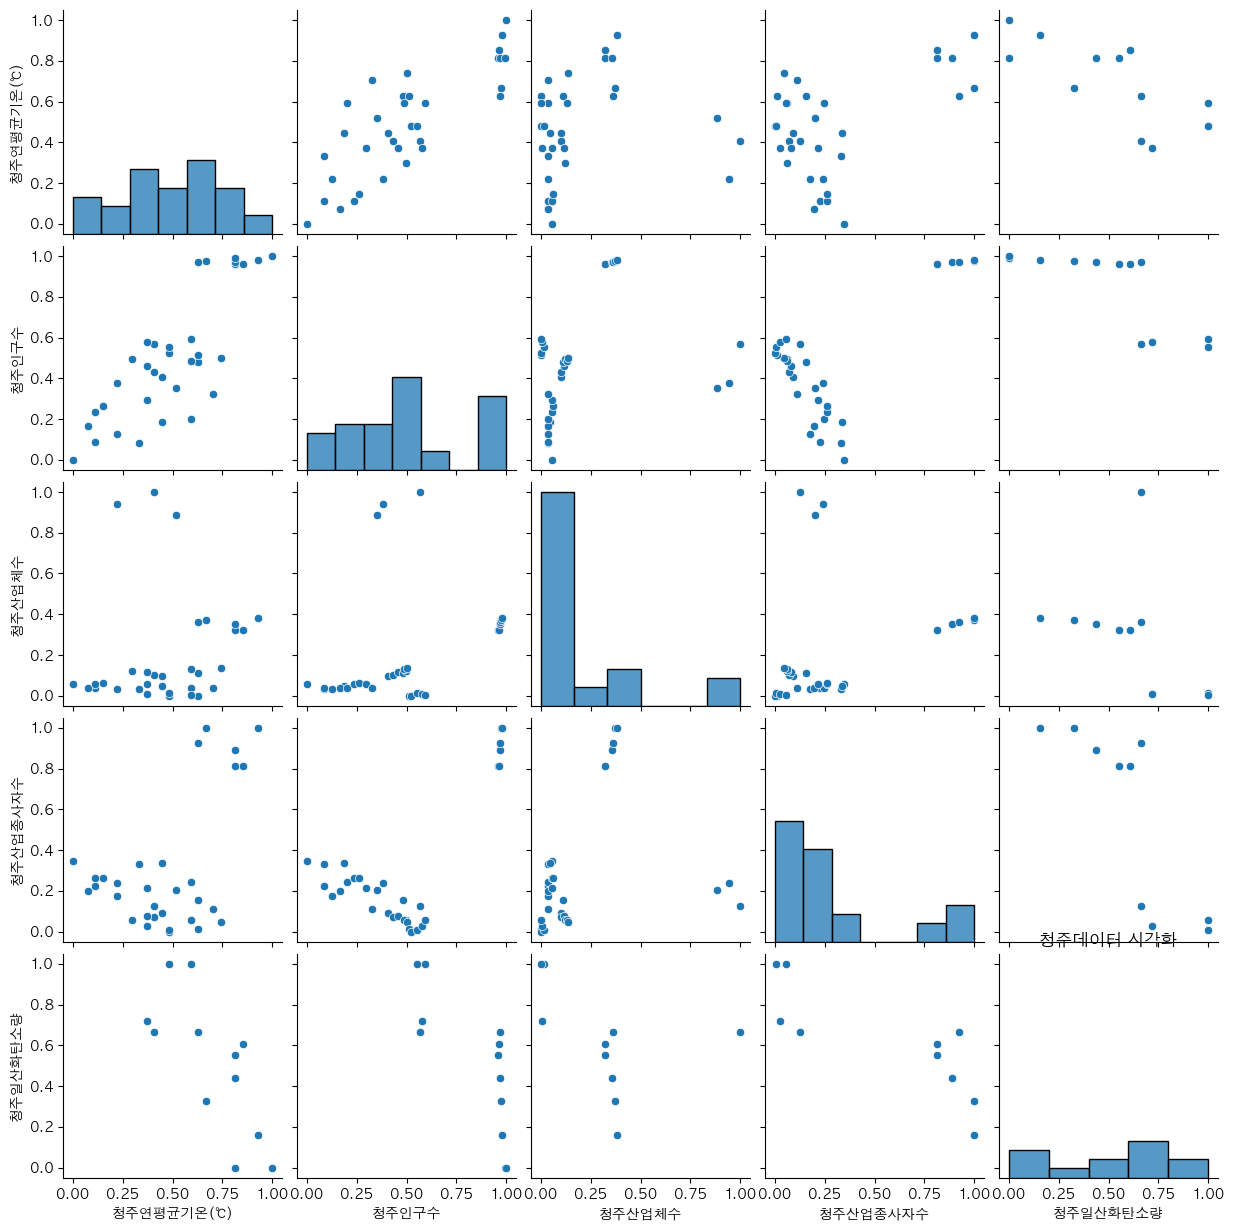

In [86]:
# 정규화한 데이터 pairplot
sns.pairplot(cj_df_scaled)
plt.title("청주데이터 시각화")
plt.show()

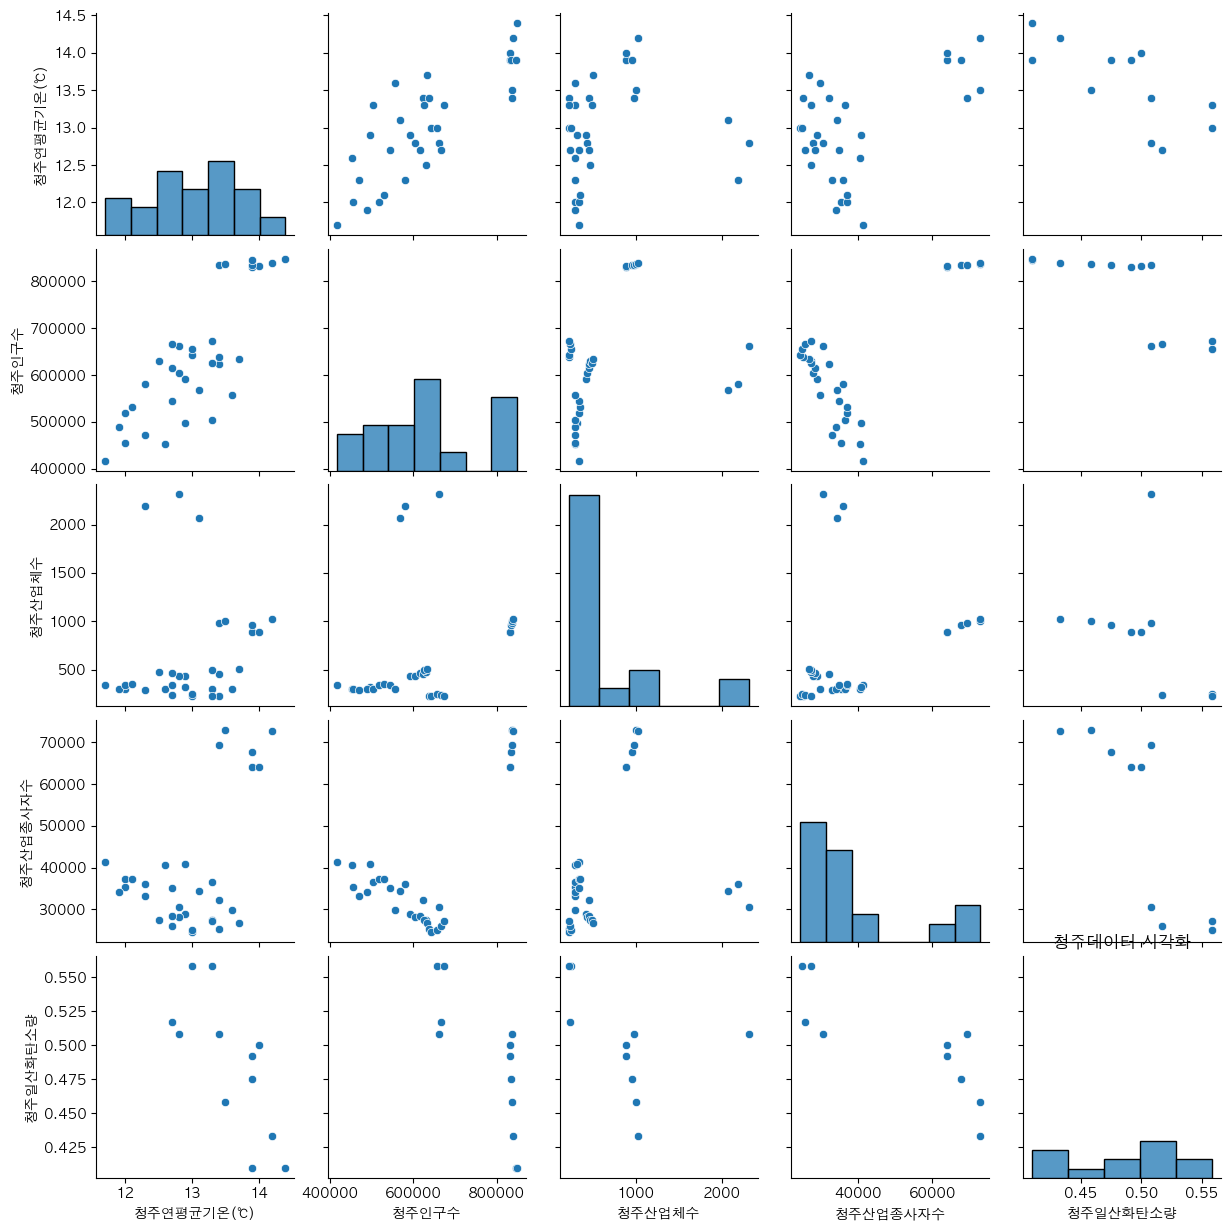

In [167]:
sns.pairplot(cj_df)
plt.title("청주데이터 시각화")
plt.show()
# plt.savefig('청주데이터pairplot') 

### 청주 데이터 선형 그래프

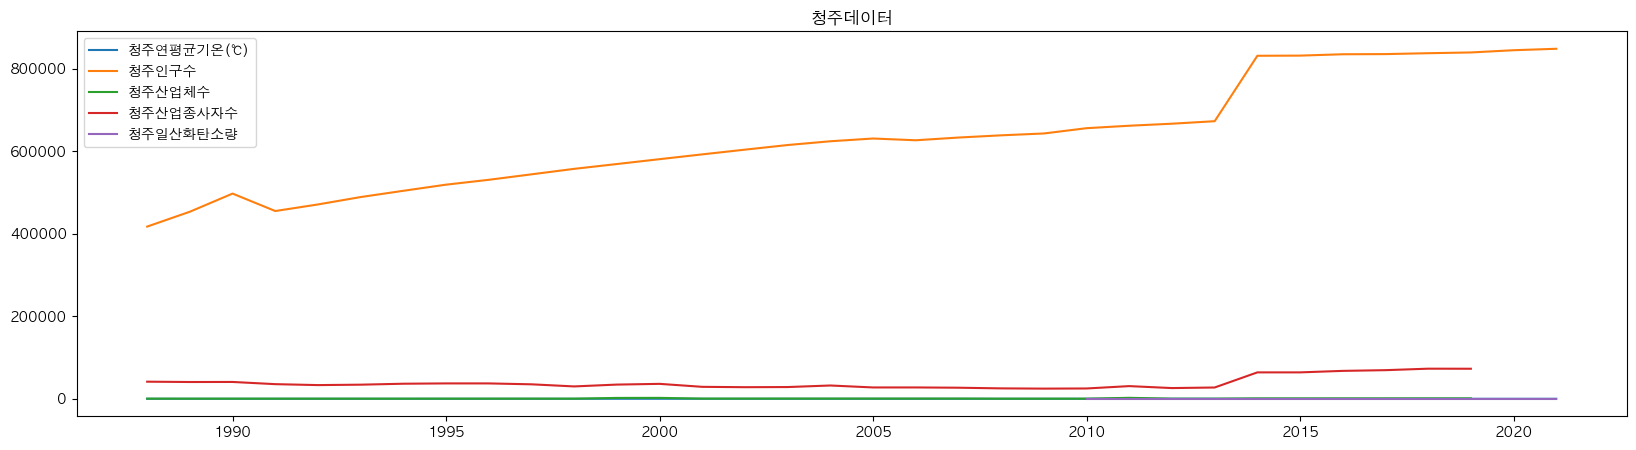

In [142]:
cj_df.plot(figsize=(20,5))
plt.title("청주데이터")
plt.savefig('청주데이터') 

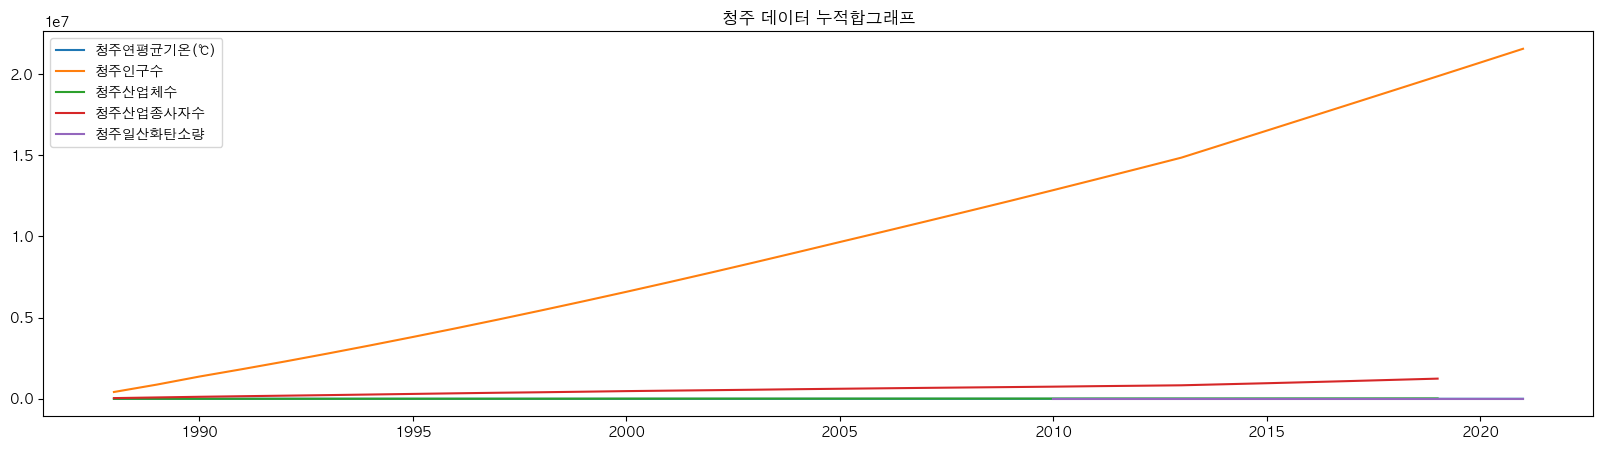

In [143]:
#누적합그래프로 보면 좀 더 명확
cj_df.cumsum().plot(figsize=(20,5))
plt.title("청주 데이터 누적합그래프")
plt.savefig('청주데이터누적합그래프') 

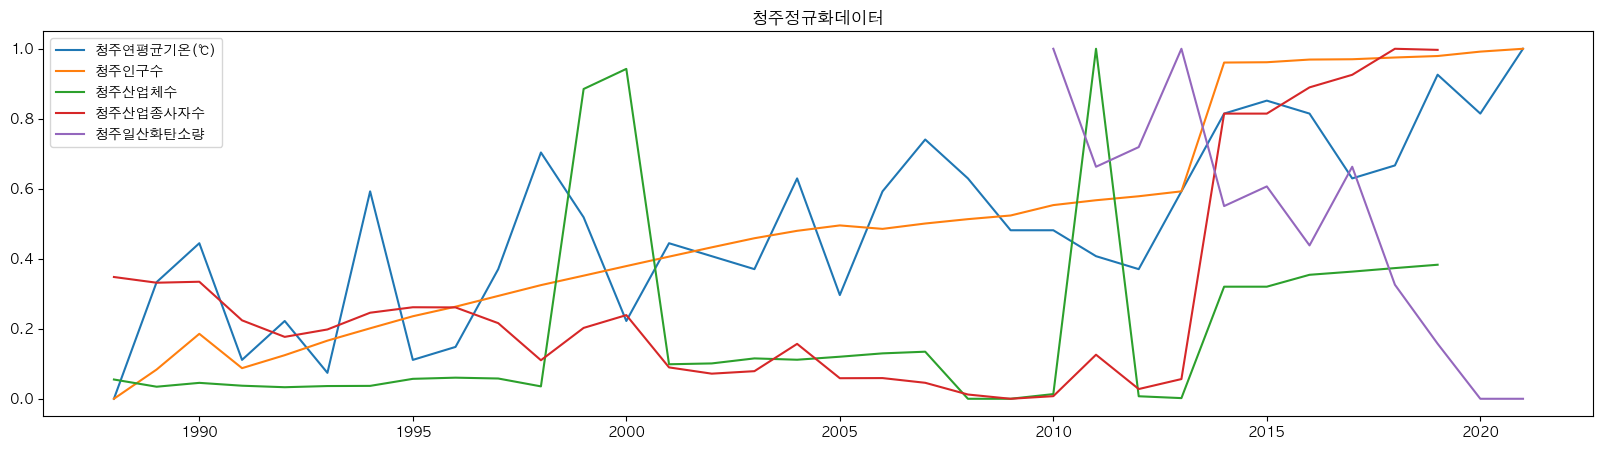

In [144]:
# 정규화 한 데이터를 가지고 그래프를 그려보면 기온그래프와 같은 양상을 보이는 컬럼이 무엇인지 볼 수 있다. 
cj_df_scaled.plot(figsize=(20,5))
plt.title("청주정규화데이터")
plt.savefig('청주정규화데이터') 

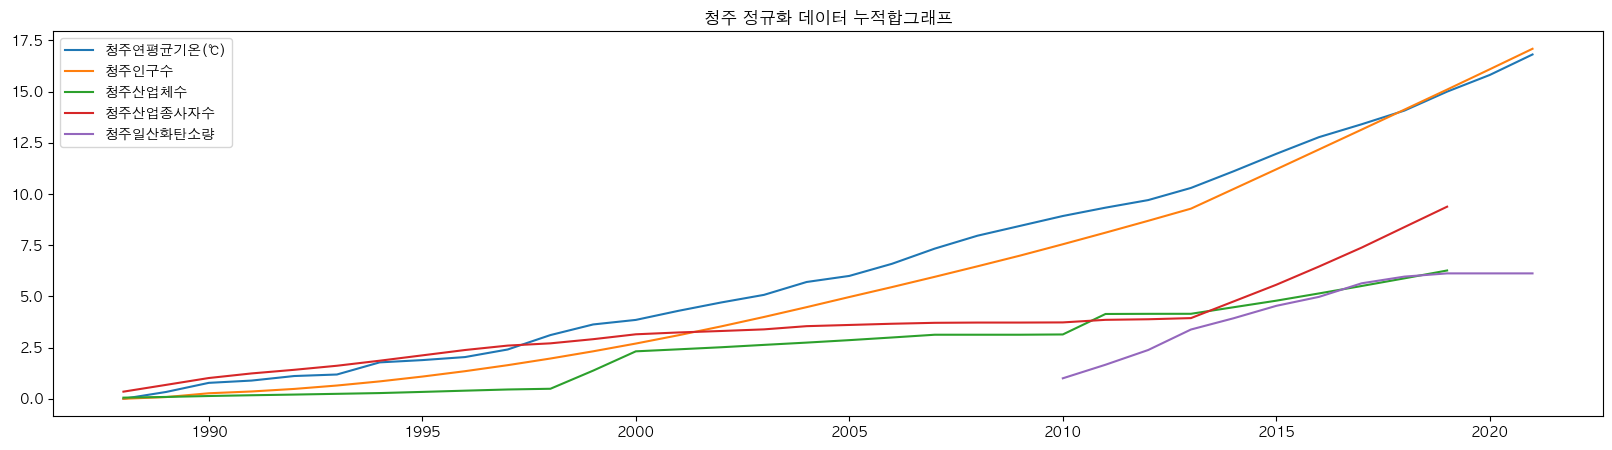

In [145]:
#누적합그래프로 보면 좀 더 명확
cj_df_scaled.cumsum().plot(figsize=(20,5))
plt.title("청주 정규화 데이터 누적합그래프")
plt.savefig('청주데이터누적합그래프') 

### 히트맵

In [180]:
cj_df_corr = cj_df.corr(method='pearson')
cj_df_corr

,청주연평균기온(℃),청주인구수,청주산업체수,청주산업종사자수,청주일산화탄소량
청주연평균기온(℃),1.000000,0.812757,0.166942,0.467008,-0.729024
청주인구수,0.812757,1.000000,0.331228,0.648877,-0.759710
청주산업체수,0.166942,0.331228,1.000000,0.301909,-0.412777
청주산업종사자수,0.467008,0.648877,0.301909,1.000000,-0.812491
청주일산화탄소량,-0.729024,-0.759710,-0.412777,-0.812491,1.000000


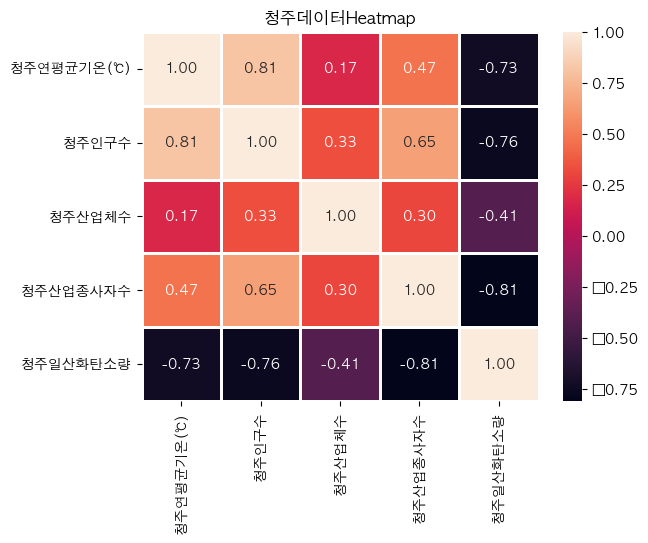

<Figure size 640x480 with 0 Axes>

In [177]:
sns.heatmap(cj_df_corr, annot=True, fmt=".2f" , linewidth=1)
plt.title("청주데이터Heatmap")
plt.show()
plt.savefig('청주데이터Heatmap') 

In [185]:
cj_df_w_corr = cj_df.corrwith(cj_df['청주연평균기온(℃)'], method='spearman')
cj_df_w_corr

청주연평균기온(℃)    1.000000
청주인구수         0.771139
청주산업체수        0.306831
청주산업종사자수      0.130451
청주일산화탄소량     -0.780924
dtype: float64

# 원주

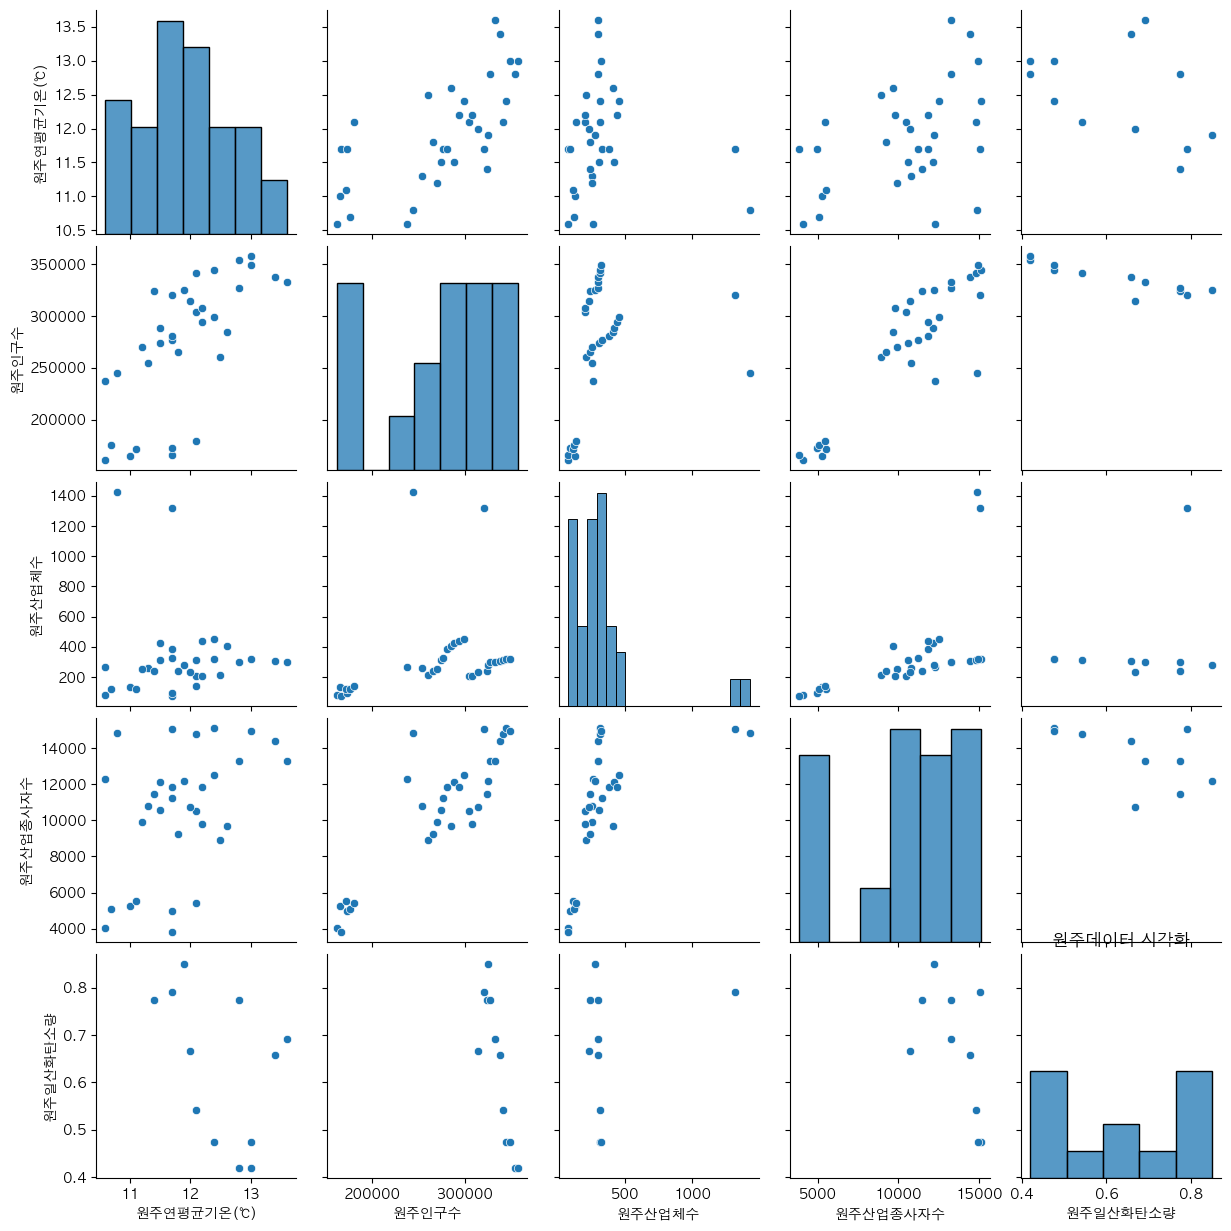

In [22]:
sns.pairplot(wj_df)
plt.title("원주데이터 시각화")
plt.show()

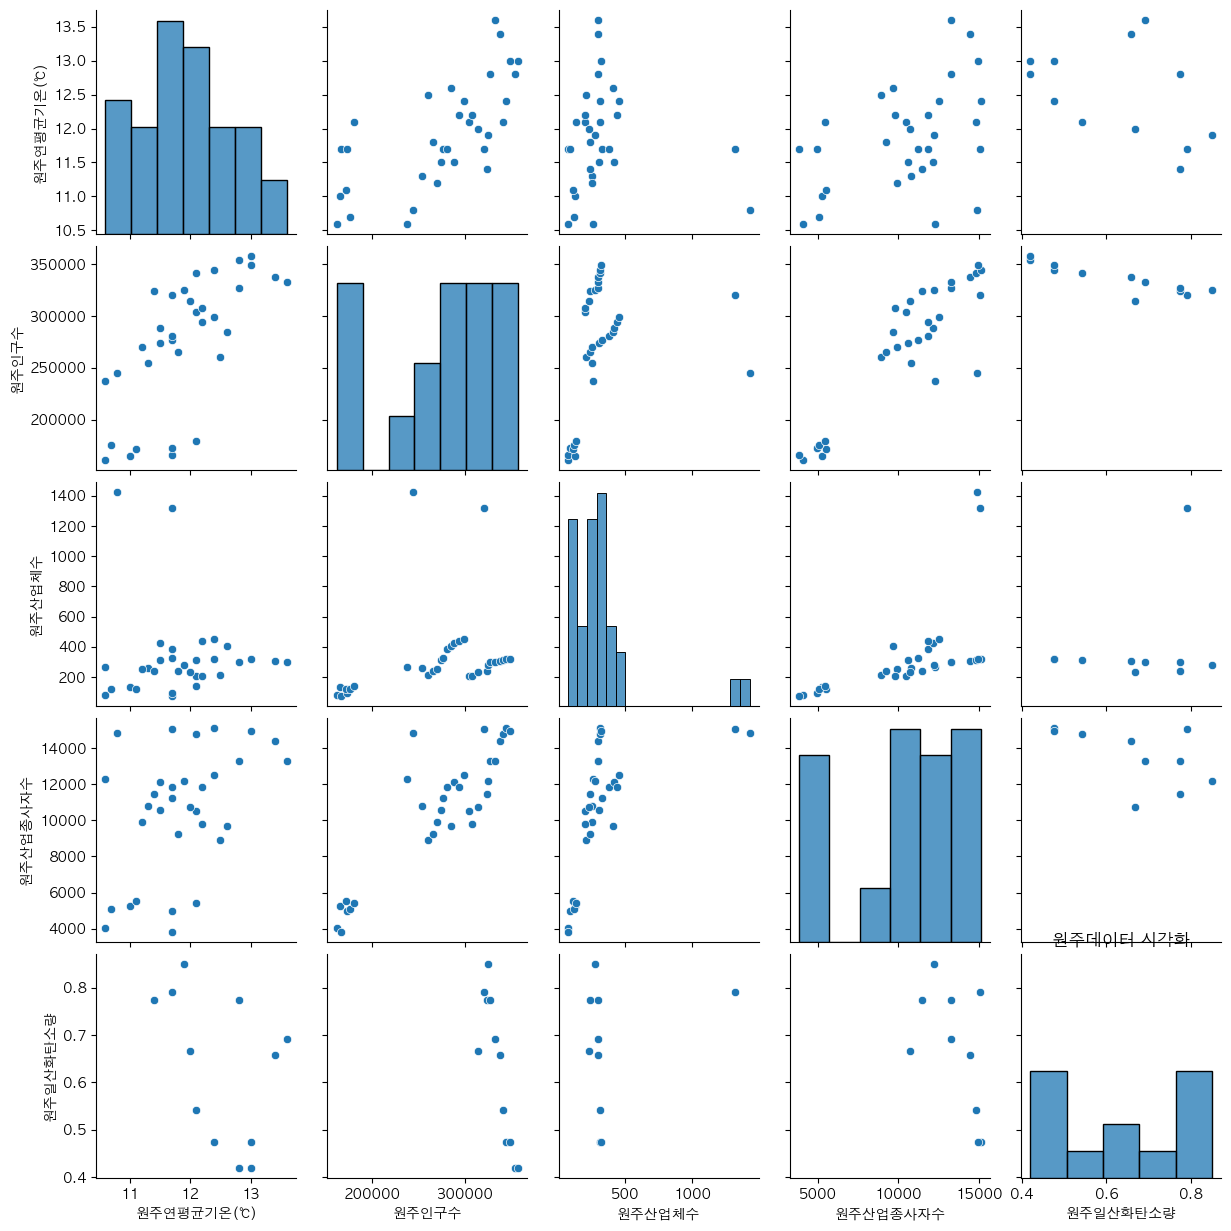

<Figure size 640x480 with 0 Axes>

In [147]:
sns.pairplot(wj_df)
plt.title("원주데이터 시각화")
plt.show()
plt.savefig('원주데이터pairplot') 

In [148]:
from sklearn import preprocessing
x = wj_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
wj_df_scaled = pd.DataFrame(x_scaled, index=wj_df.index, columns=wj_df.columns)

Text(0.5, 1.0, '원주데이터')

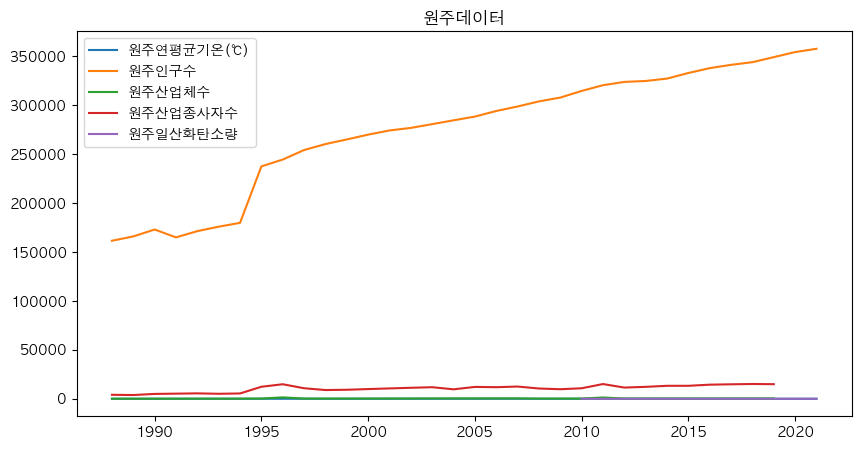

In [193]:
wj_df.plot(figsize=(10,5))
plt.title("원주데이터")
# plt.savefig('원주데이터') 

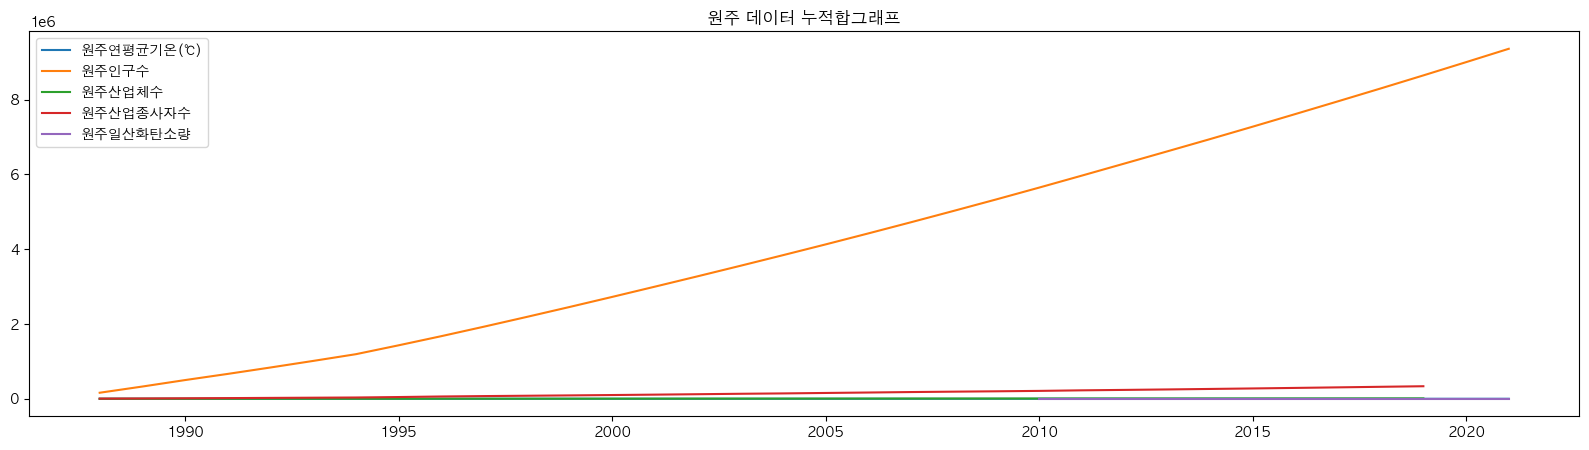

In [151]:
#누적합그래프로 보면 좀 더 명확
wj_df.cumsum().plot(figsize=(20,5))
plt.title("원주 데이터 누적합그래프")
plt.savefig('원주데이터누적합그래프') 

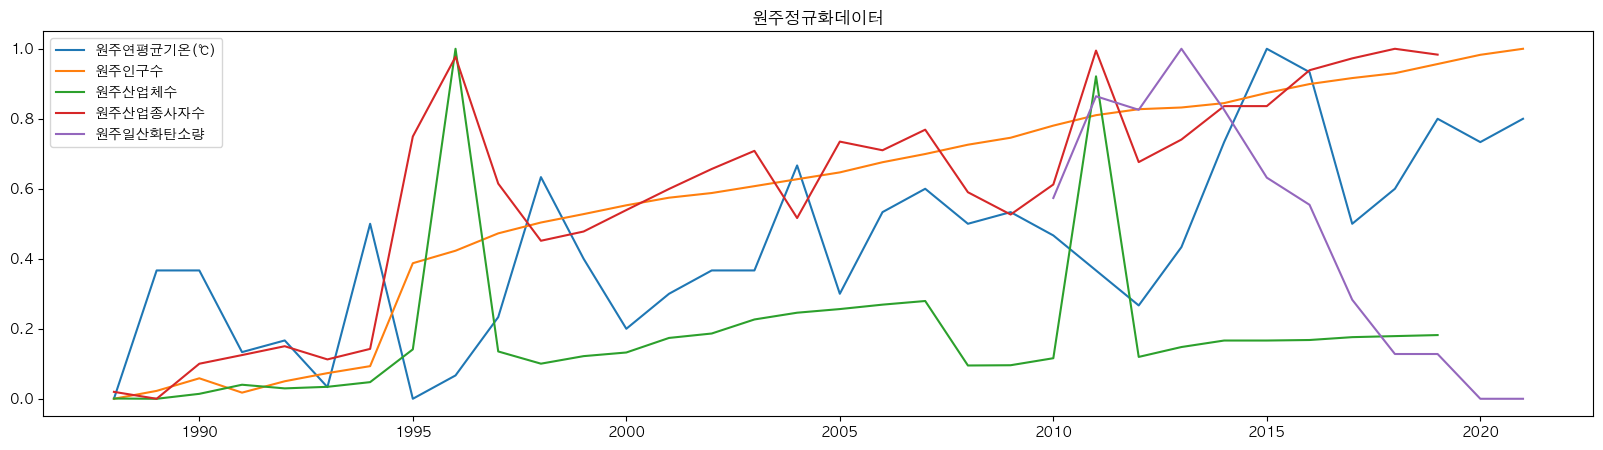

In [152]:
# 정규화 한 데이터를 가지고 그래프를 그려보면 기온그래프와 같은 양상을 보이는 컬럼이 무엇인지 볼 수 있다. 
wj_df_scaled.plot(figsize=(20,5))
plt.title("원주정규화데이터")
plt.savefig('원주정규화데이터') 

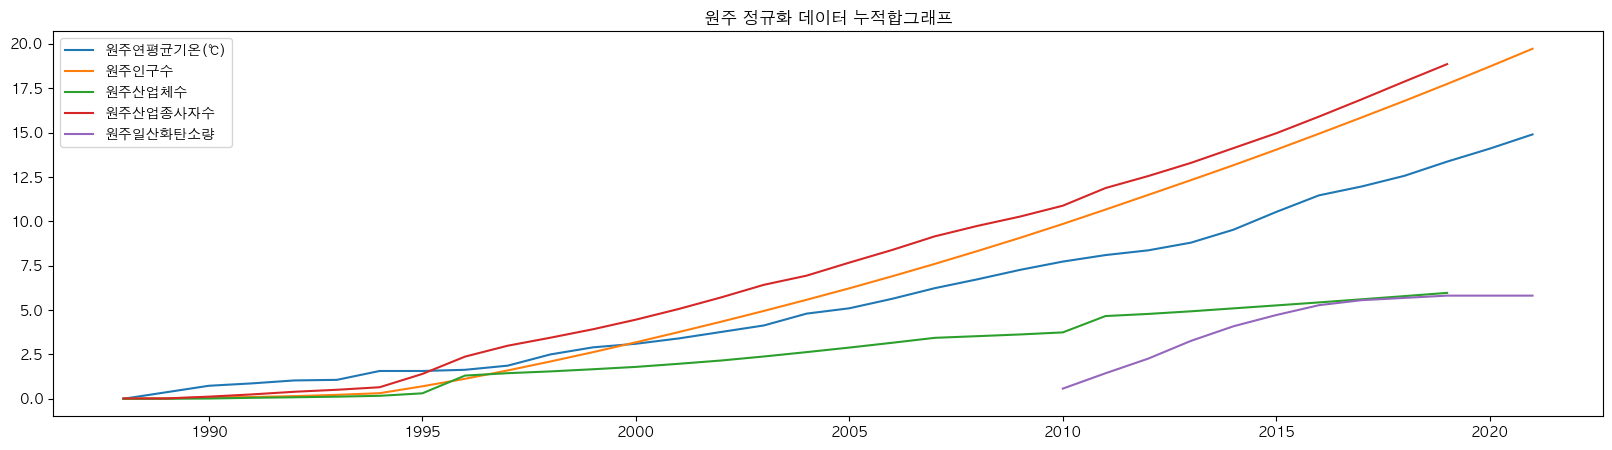

In [153]:
#누적합그래프로 보면 좀 더 명확
wj_df_scaled.cumsum().plot(figsize=(20,5))
plt.title("원주 정규화 데이터 누적합그래프")
plt.savefig('원주데이터누적합그래프') 

### 히트맵

In [181]:
wj_df_corr = wj_df.corr(method='pearson')
wj_df_corr

,원주연평균기온(℃),원주인구수,원주산업체수,원주산업종사자수,원주일산화탄소량
원주연평균기온(℃),1.000000,0.682799,-0.051258,0.445098,-0.416857
원주인구수,0.682799,1.000000,0.292298,0.888413,-0.884588
원주산업체수,-0.051258,0.292298,1.000000,0.577498,0.262582
원주산업종사자수,0.445098,0.888413,0.577498,1.000000,-0.541914
원주일산화탄소량,-0.416857,-0.884588,0.262582,-0.541914,1.000000


/Users/hyeya/.venv/Python_Friday/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/hyeya/.venv/Python_Friday/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


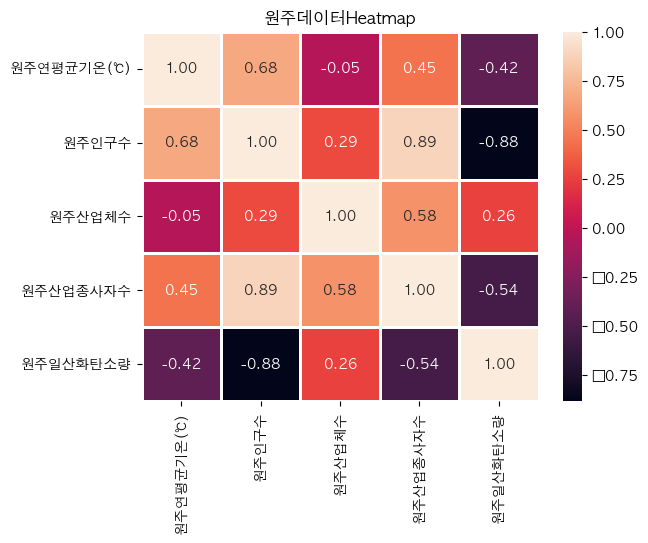

<Figure size 640x480 with 0 Axes>

In [182]:
sns.heatmap(wj_df_corr, annot=True, fmt=".2f" , linewidth=1)
plt.title("원주데이터Heatmap")
plt.show()
plt.savefig('원주데이터Heatmap') 

# 제주

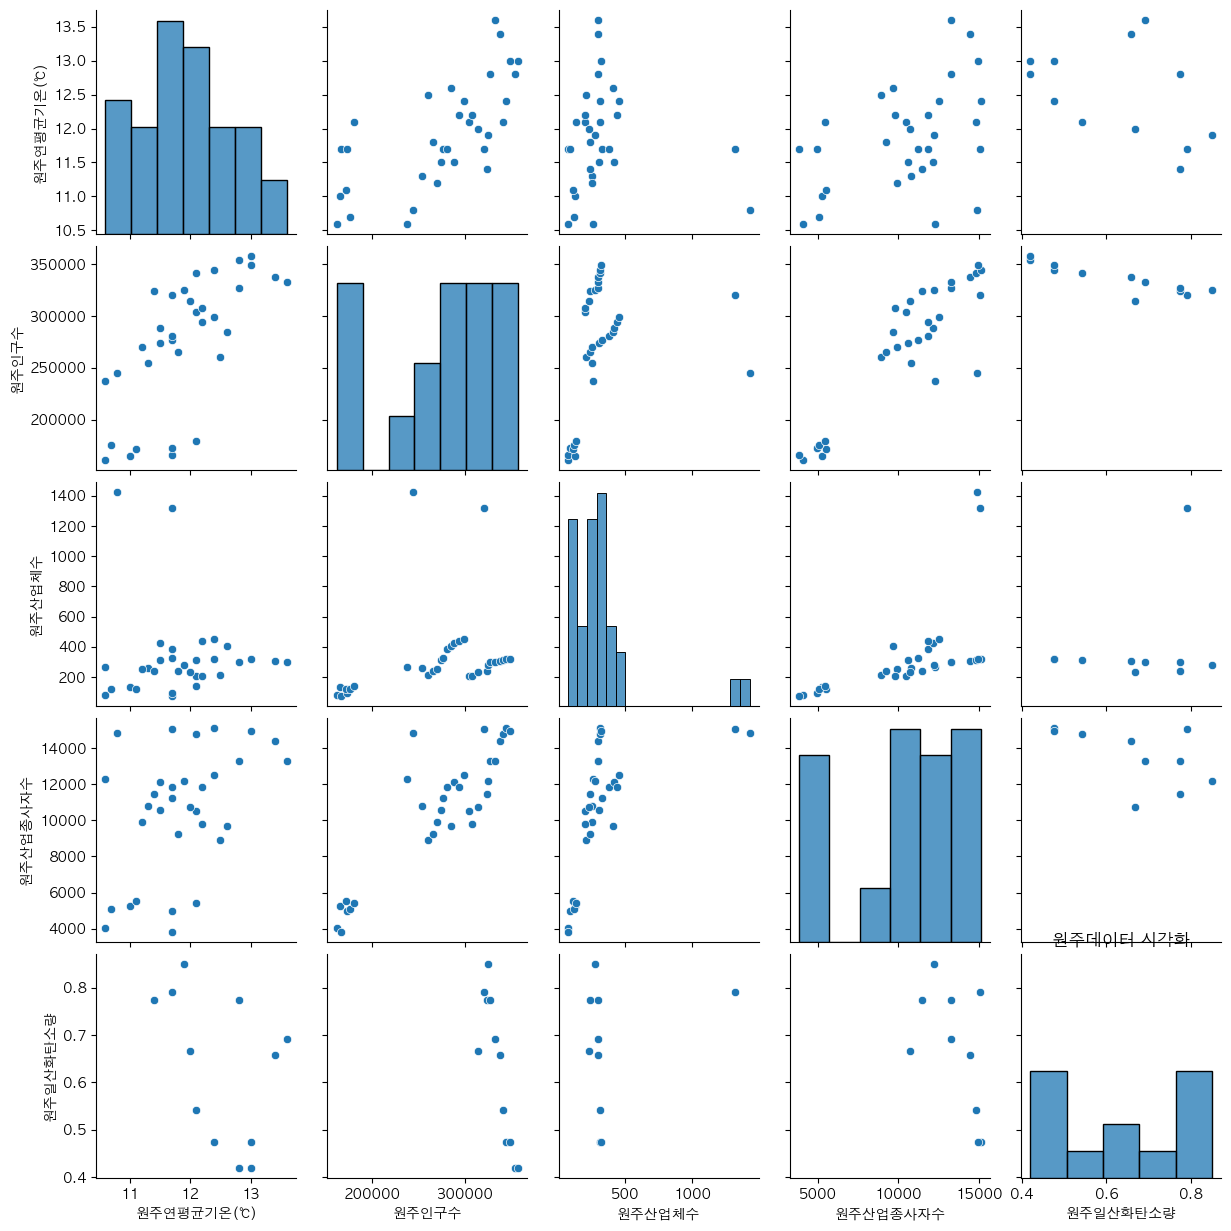

In [22]:
sns.pairplot(jj_df)
plt.title("제주데이터 시각화")
plt.show()

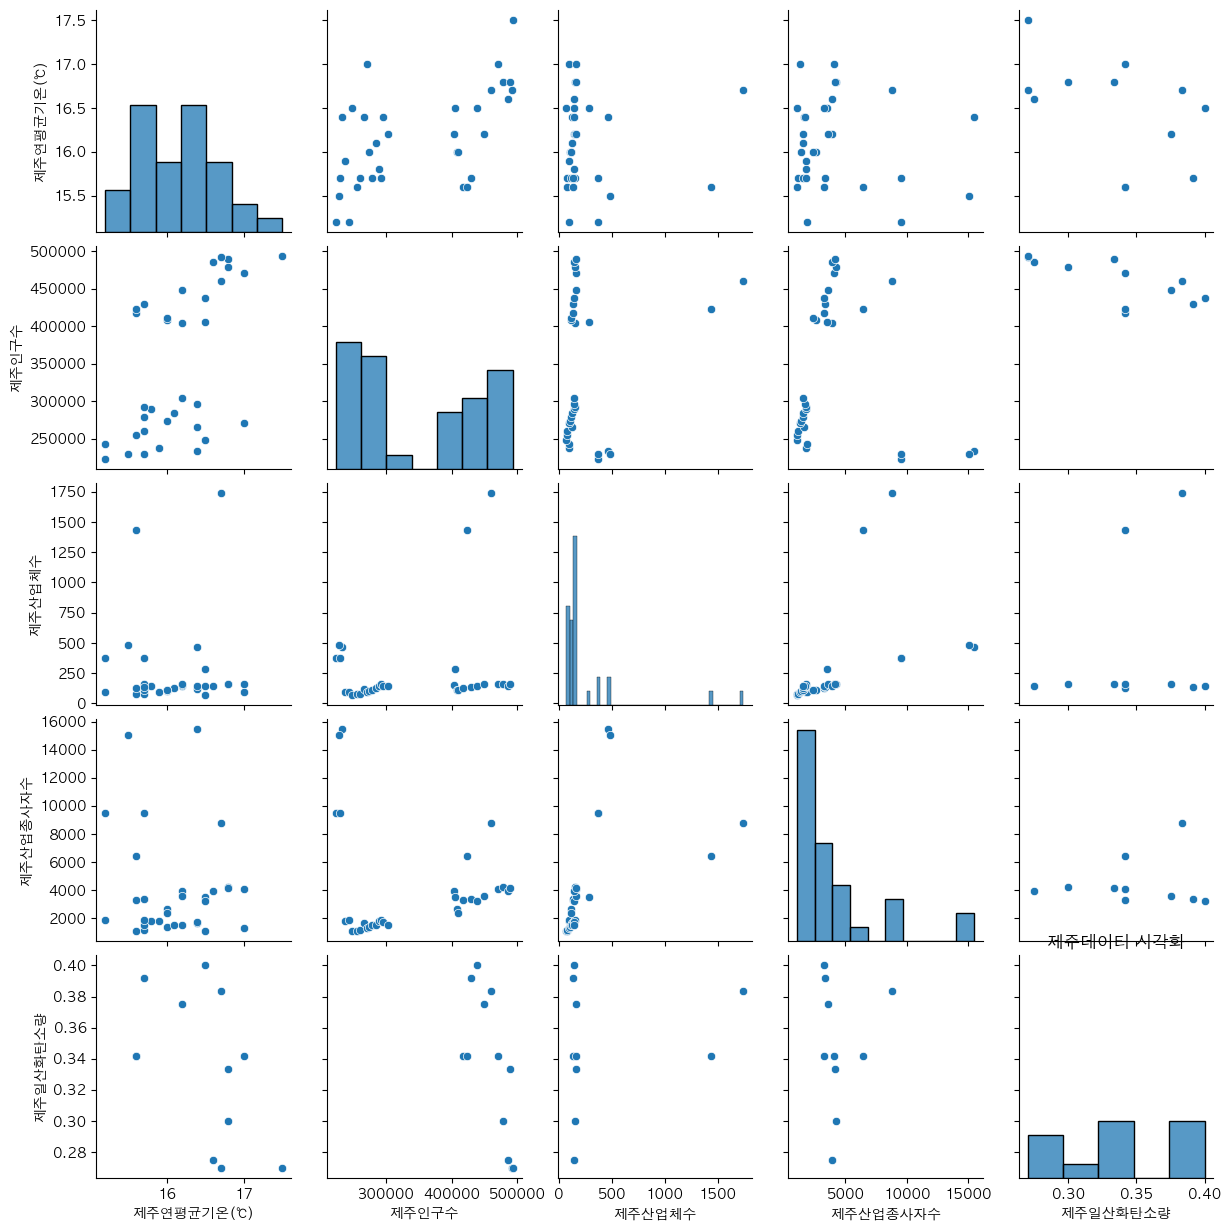

<Figure size 640x480 with 0 Axes>

In [154]:
sns.pairplot(jj_df)
plt.title("제주데이터 시각화")
plt.show()
plt.savefig('제주데이터pairplot') 

In [155]:
from sklearn import preprocessing
x = jj_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
jj_df_scaled = pd.DataFrame(x_scaled, index=jj_df.index, columns=jj_df.columns)

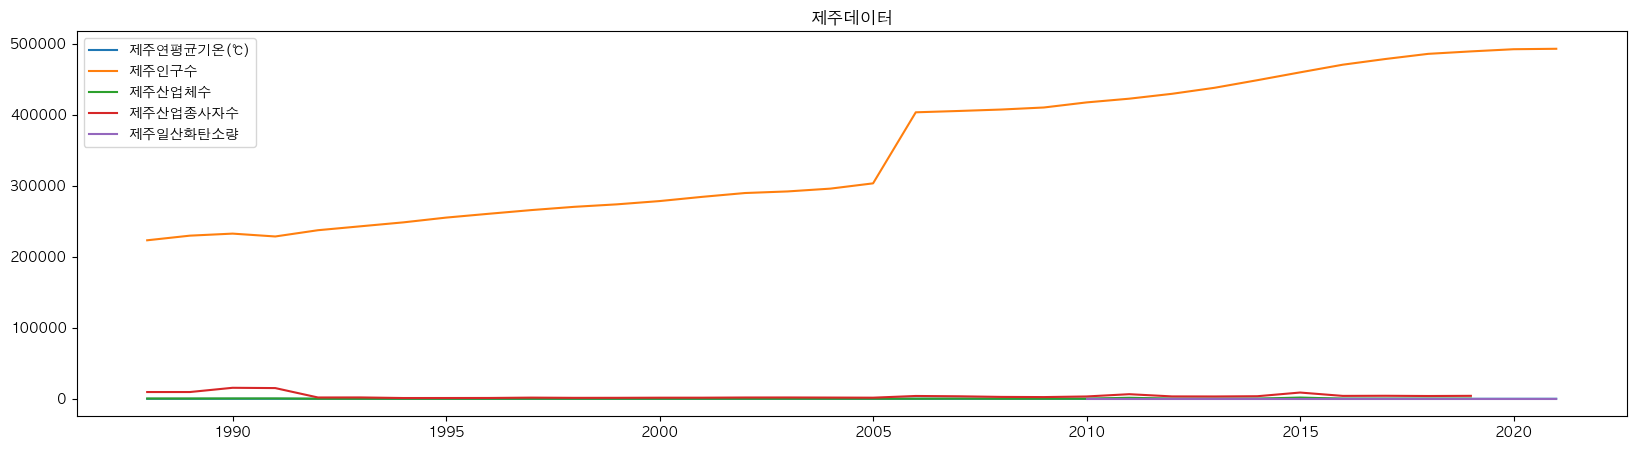

In [156]:
jj_df.plot(figsize=(20,5))
plt.title("제주데이터")
plt.savefig('제주데이터') 

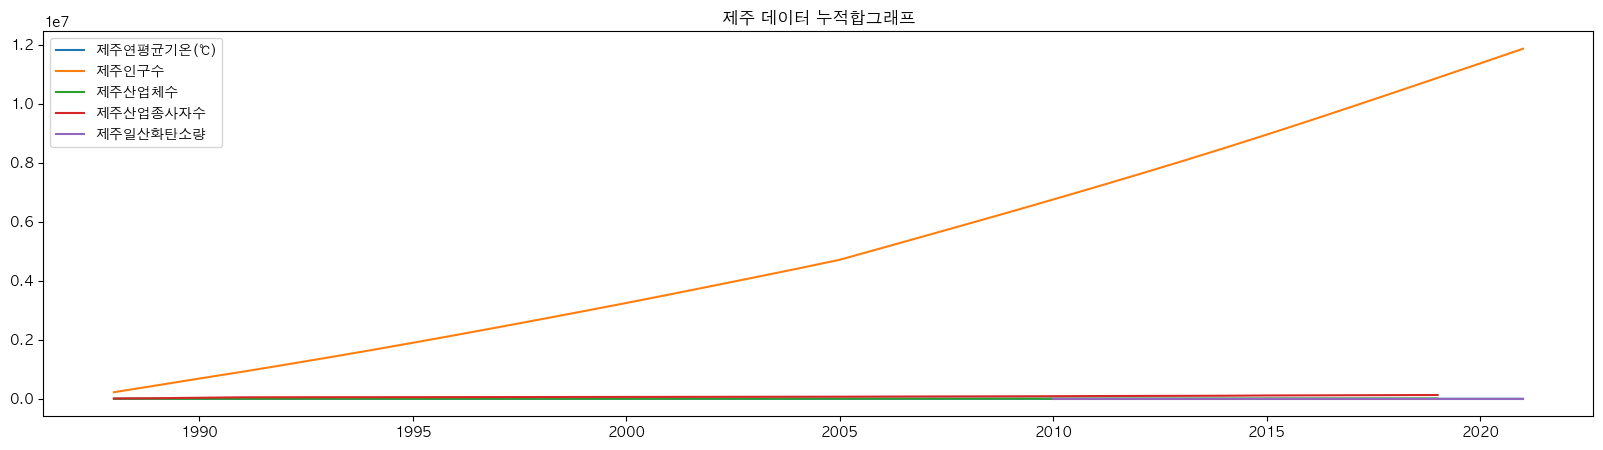

In [157]:
#누적합그래프로 보면 좀 더 명확
jj_df.cumsum().plot(figsize=(20,5))
plt.title("제주 데이터 누적합그래프")
plt.savefig('제주데이터누적합그래프') 

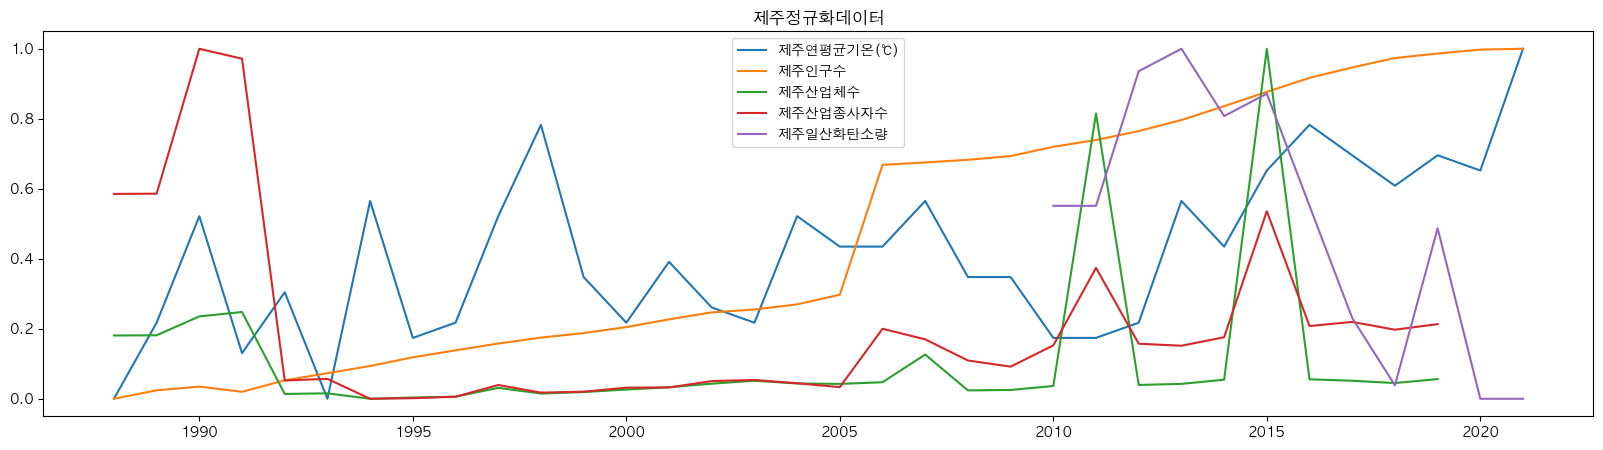

In [158]:
# 정규화 한 데이터를 가지고 그래프를 그려보면 기온그래프와 같은 양상을 보이는 컬럼이 무엇인지 볼 수 있다. 
jj_df_scaled.plot(figsize=(20,5))
plt.title("제주정규화데이터")
plt.savefig('제주정규화데이터') 

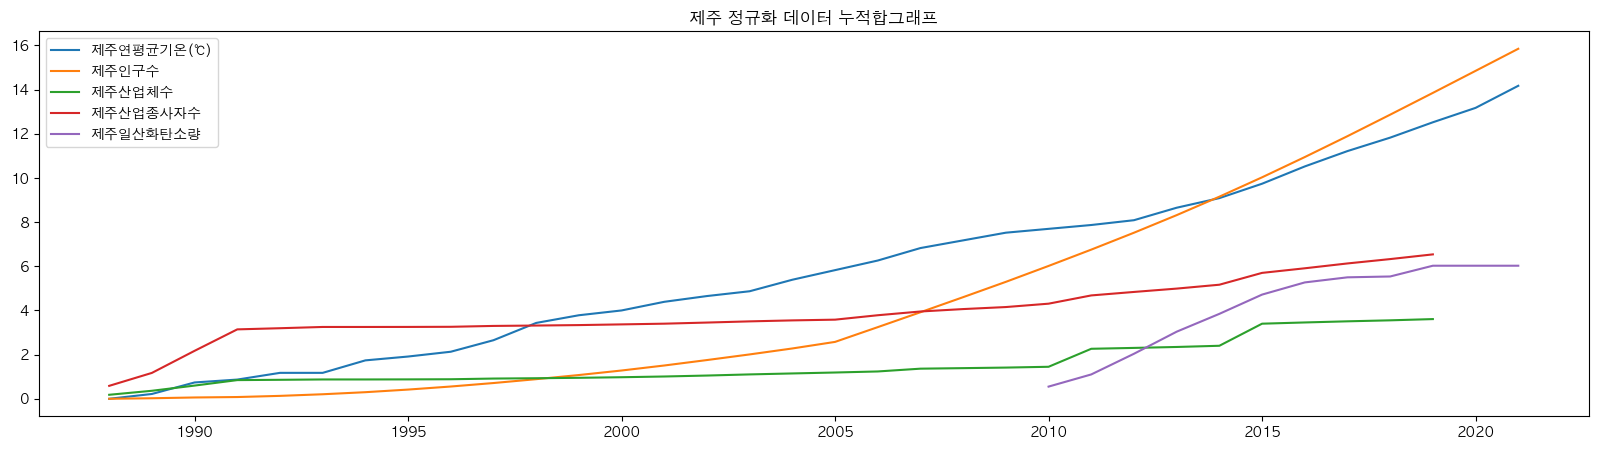

In [159]:
#누적합그래프로 보면 좀 더 명확
jj_df_scaled.cumsum().plot(figsize=(20,5))
plt.title("제주 정규화 데이터 누적합그래프")
plt.savefig('제주데이터누적합그래프') 

In [187]:
jj_df_corr = jj_df.corr(method='pearson')
jj_df_corr

,제주연평균기온(℃),제주인구수,제주산업체수,제주산업종사자수,제주일산화탄소량
제주연평균기온(℃),1.000000,0.561365,0.011543,-0.095969,-0.488866
제주인구수,0.561365,1.000000,0.208753,-0.087674,-0.713830
제주산업체수,0.011543,0.208753,1.000000,0.515217,0.209466
제주산업종사자수,-0.095969,-0.087674,0.515217,1.000000,0.110411
제주일산화탄소량,-0.488866,-0.713830,0.209466,0.110411,1.000000


/Users/hyeya/.venv/Python_Friday/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/hyeya/.venv/Python_Friday/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


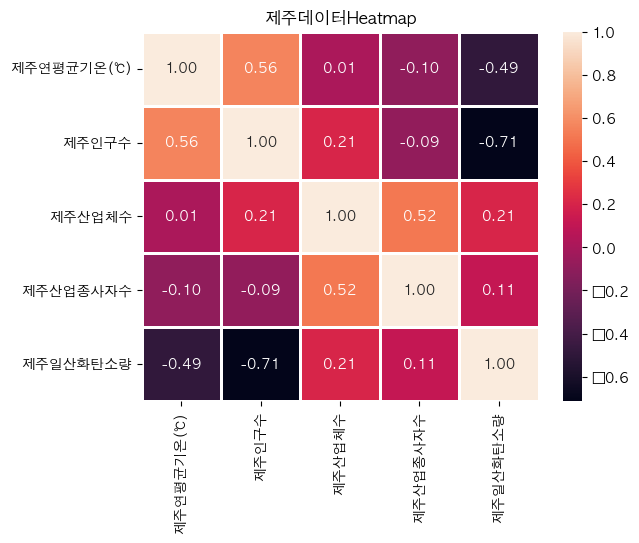

<Figure size 640x480 with 0 Axes>

In [188]:
sns.heatmap(jj_df_corr, annot=True, fmt=".2f" , linewidth=1)
plt.title("제주데이터Heatmap")
plt.show()
plt.savefig('제주데이터Heatmap') 

# 구미

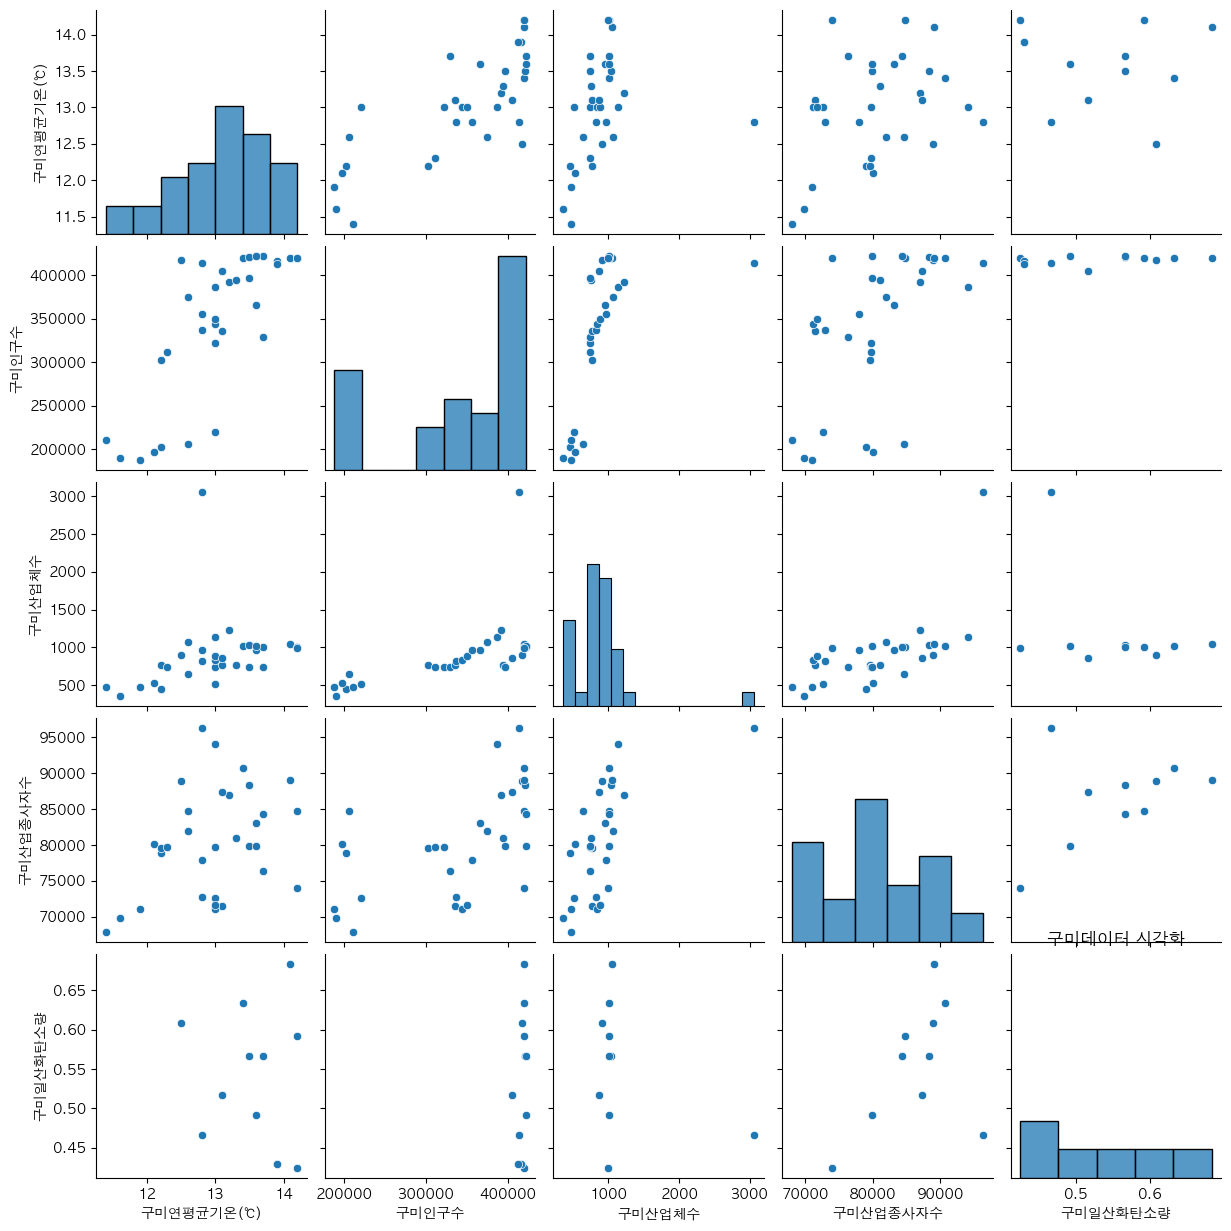

In [24]:
sns.pairplot(gm_df)
plt.title("구미데이터 시각화")
plt.show()

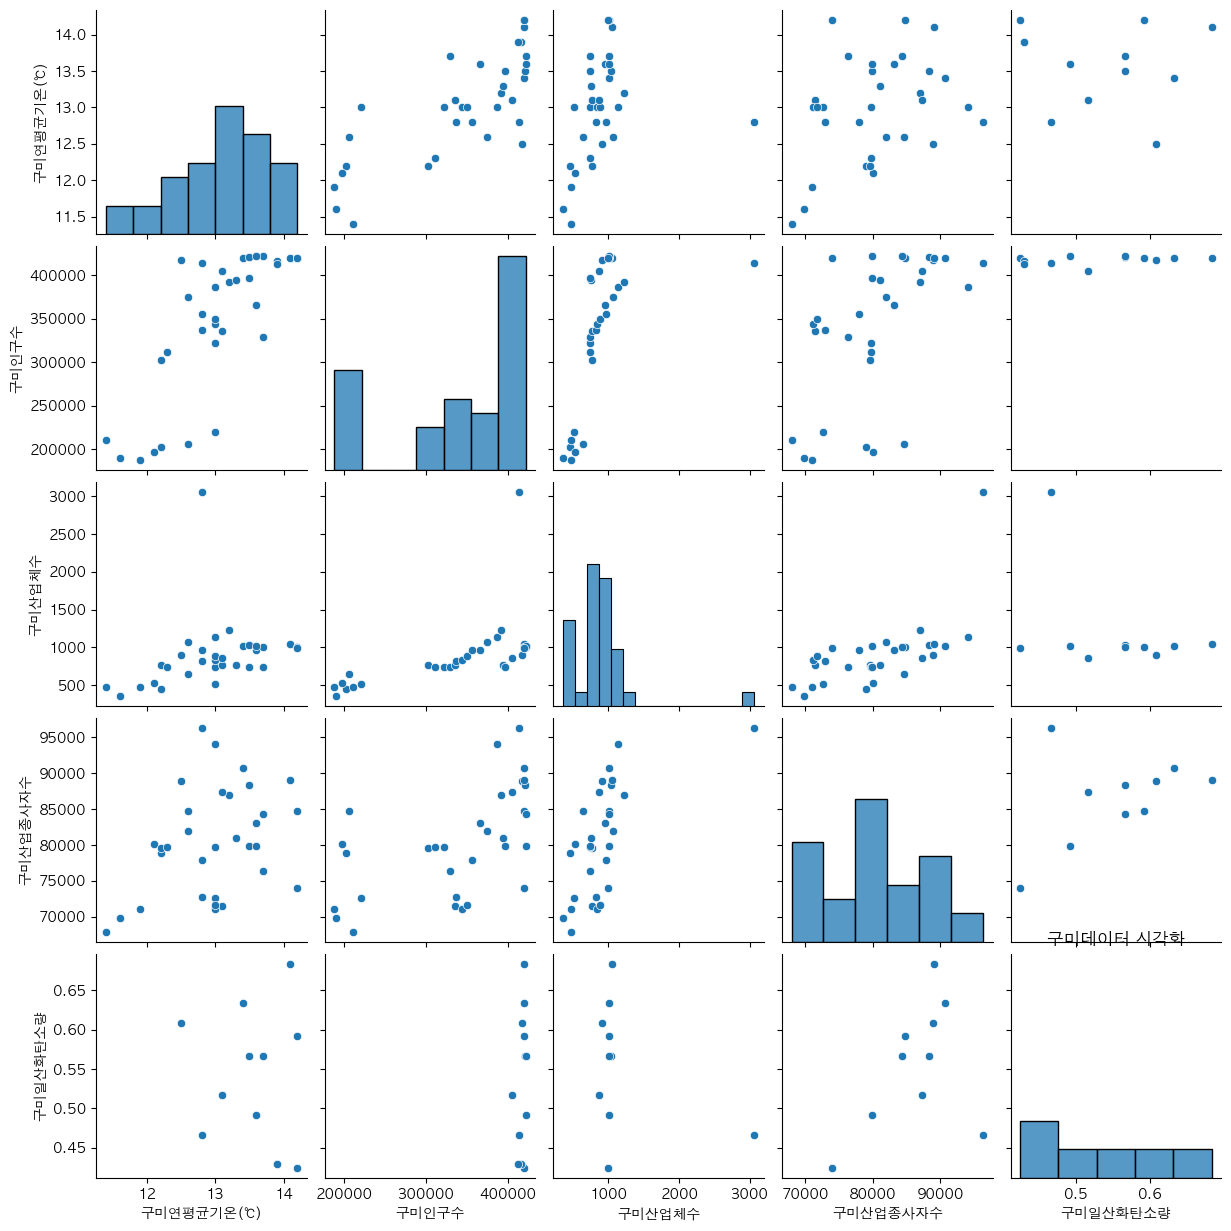

<Figure size 640x480 with 0 Axes>

In [160]:
sns.pairplot(gm_df)
plt.title("구미데이터 시각화")
plt.show()
plt.savefig('구미데이터pairplot') 

In [161]:
from sklearn import preprocessing
x = gm_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
gm_df_scaled = pd.DataFrame(x_scaled, index=gm_df.index, columns=gm_df.columns)

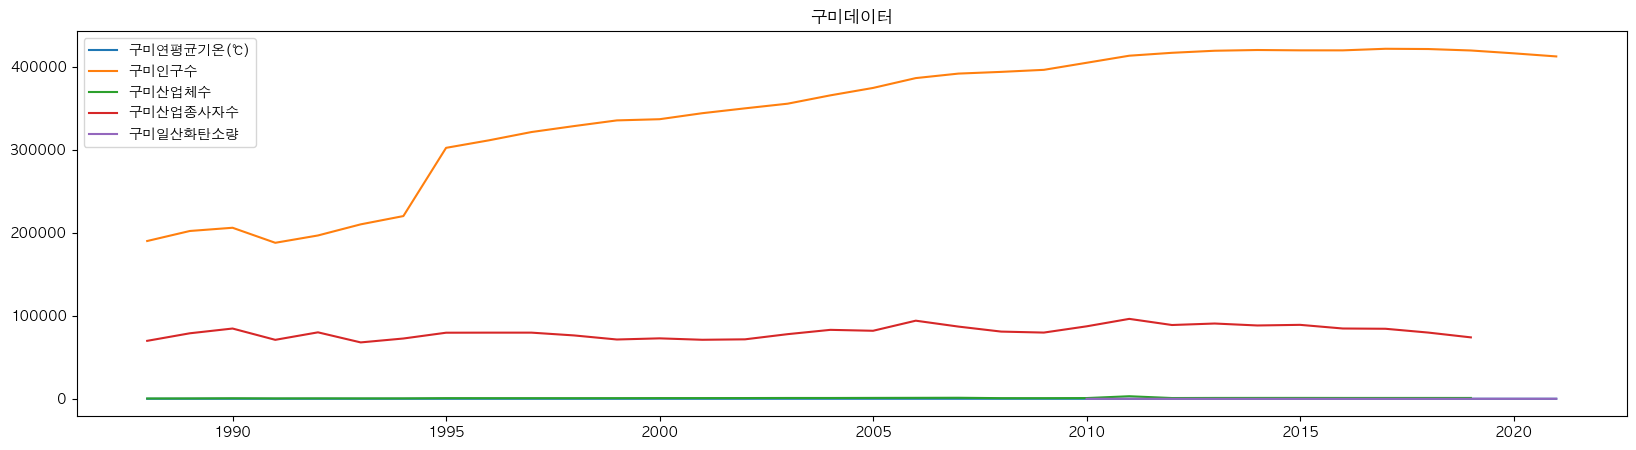

In [162]:
gm_df.plot(figsize=(20,5))
plt.title("구미데이터")
plt.savefig('구미데이터') 

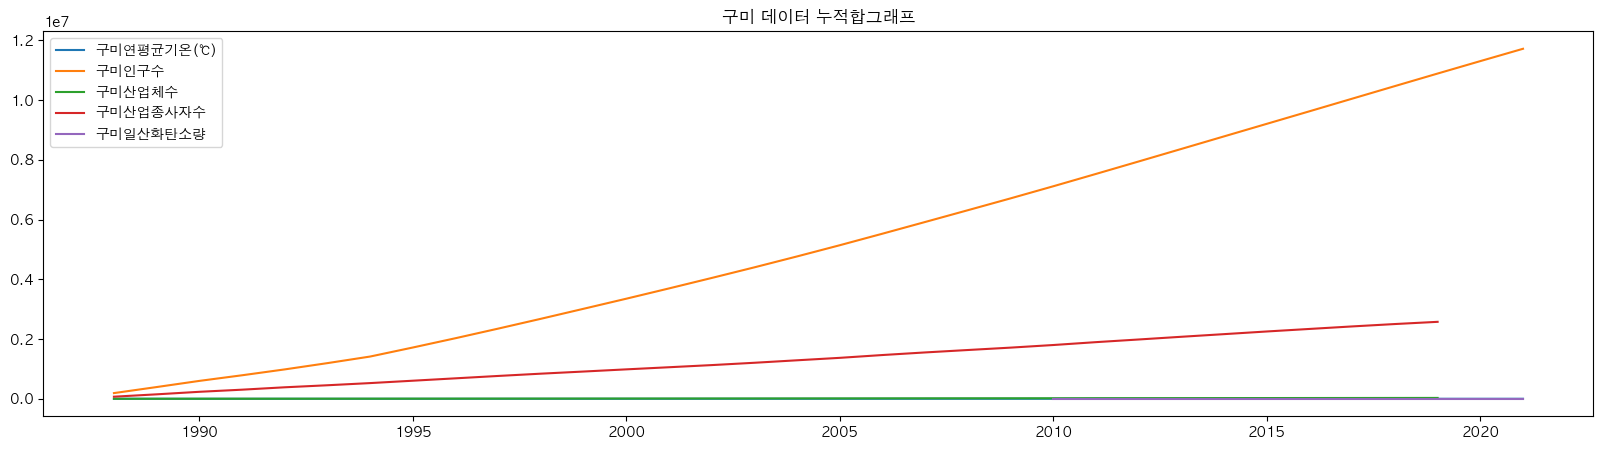

In [163]:
#누적합그래프로 보면 좀 더 명확
gm_df.cumsum().plot(figsize=(20,5))
plt.title("구미 데이터 누적합그래프")
plt.savefig('구미데이터누적합그래프') 

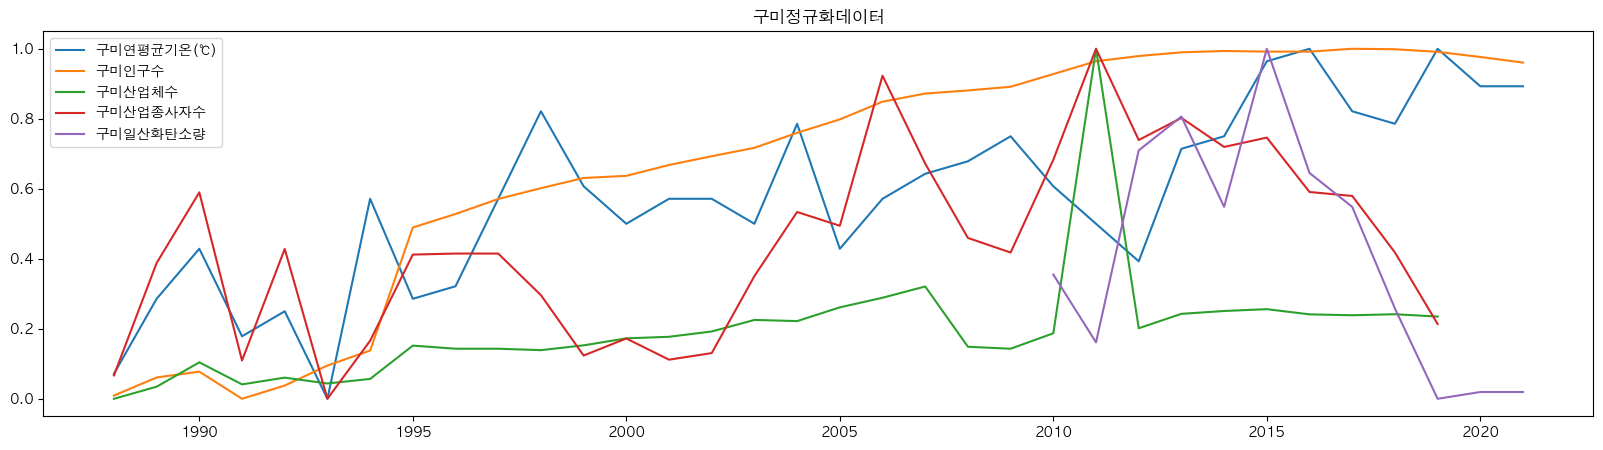

In [164]:
# 정규화 한 데이터를 가지고 그래프를 그려보면 기온그래프와 같은 양상을 보이는 컬럼이 무엇인지 볼 수 있다. 
gm_df_scaled.plot(figsize=(20,5))
plt.title("구미정규화데이터")
plt.savefig('구미정규화데이터') 

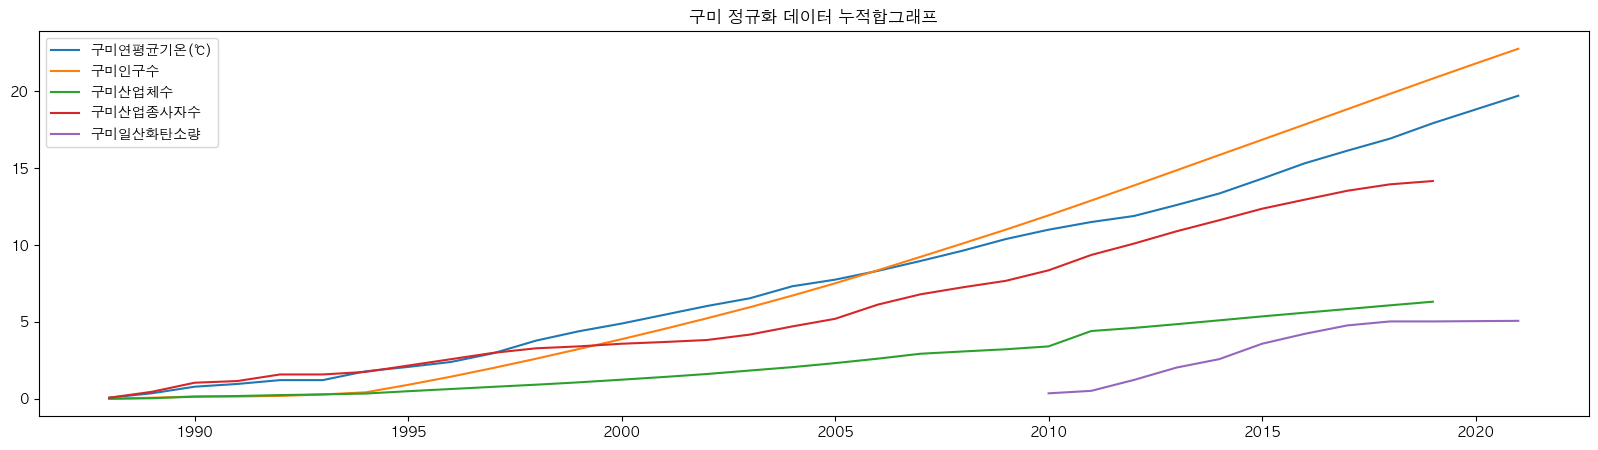

In [165]:
#누적합그래프로 보면 좀 더 명확
gm_df_scaled.cumsum().plot(figsize=(20,5))
plt.title("구미 정규화 데이터 누적합그래프")
plt.savefig('구미데이터누적합그래프') 

In [190]:
gm_df_corr = gm_df.corr(method='pearson')
gm_df_corr

,구미연평균기온(℃),구미인구수,구미산업체수,구미산업종사자수,구미일산화탄소량
구미연평균기온(℃),1.000000,0.776191,0.294717,0.352347,-0.109793
구미인구수,0.776191,1.000000,0.566773,0.574709,0.340791
구미산업체수,0.294717,0.566773,1.000000,0.624867,-0.367001
구미산업종사자수,0.352347,0.574709,0.624867,1.000000,0.425532
구미일산화탄소량,-0.109793,0.340791,-0.367001,0.425532,1.000000


/Users/hyeya/.venv/Python_Friday/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/hyeya/.venv/Python_Friday/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


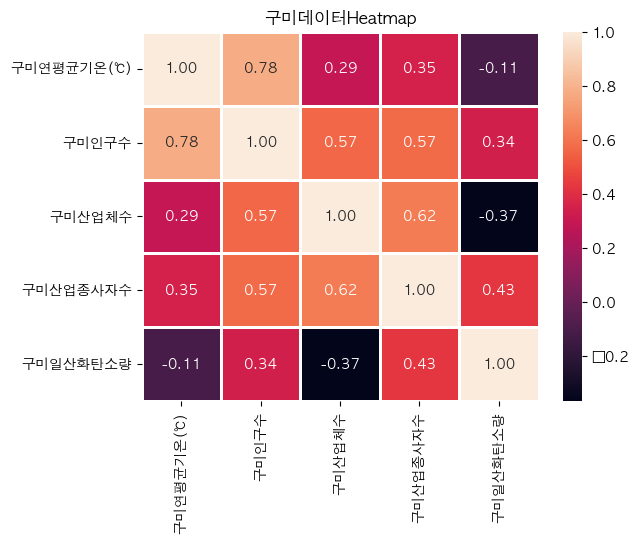

<Figure size 640x480 with 0 Axes>

In [191]:
sns.heatmap(gm_df_corr, annot=True, fmt=".2f" , linewidth=1)
plt.title("구미데이터Heatmap")
plt.show()
plt.savefig('구미데이터Heatmap') 